# Comparison of statistical performance between two models

# 0 - Machine Learning Theory

## Trained ML Model

Let $\hat{f_A}$ be a trained ML model:

$$\hat{f_A} : \mathcal{X} \rightarrow \mathcal{Y} \quad x \mapsto \hat{f_A}(x)$$

In medical imaging, typically, $x$ is an image (or a video) and $y$ can be any type of output, for instance, a real number (regression), a class (classification), a segmentation map (segmentation), an image (image translation).

We will also consider simpler examples where $\mathcal{X} = \mathbb{R}$ or $\mathcal{X} = \mathbb{R^d}$.

## Ground-Truth Function

Let $g$ be the function which associates any input to the ground-truth prediction:

$$g : \mathcal{X} \rightarrow \mathcal{Y} \quad x \mapsto g(x)$$

**Note:** One could also denote $f$ the ground-truth function that $\hat{f_A}$ approximates but it can be convenient to have separate notations, in particular for the cases where the ground-truth itself will be uncertain or if we have multiple ground-truths (for example if we have multiple raters).

## Validation Metric

Let $metric$ be a validation metric:

$$metric : \mathcal{Y} \times \mathcal{Y} \rightarrow \mathbb{R} \quad (y, y') \mapsto metric(y, y')$$

**Note:** For example,
- Segmentation:
  - $metric(y, y') = \text{DSC}(y, y')$
  - $metric(y, y') = \text{HD}_{95}(y, y')$
- Classification:
  - $metric(y, y') = \delta_{y, y'}$
- Regression:
  - $metric(y, y') = |y - y'|$
  - $metric(y, y') = (y - y')^2$

## Model Performance

The performance of model $f$ on input $x$ will thus be:

$$metric(f(x), g(x))$$

## Random Variable $V_A$

Let $\Omega$ be the sample space corresponding to all possible inputs. Here we consider the case of a trained model (as opposed to a learning procedure), thus the only randomness comes from the test examples and we have $\Omega = \mathcal{X}$. One considers the following random variable $V_A$ which provides the performance of $\hat{f_A}$ according to the metric $metric$ on a given input $x$:

$$V_A : \Omega \rightarrow \mathbb{R} \quad x \mapsto V(x) = metric(\hat{f_A}(x), g(x))$$

We will assume that the first and second-order moments of $V_A$ exist and are denoted respectively $\mu_A$ and $\sigma_A^2$.

For a given $x \in \mathcal{X}$, we denote $v_A = V_A(x)$ the realization of $v_A$. We have access to a test sample $S_{test} = (x^{(1)}, \ldots, x^{(n)}) \subset \mathcal{X}$ of size $n$. The values of the performance metric on the test sample are $(v_A^{(1)} = V_A(x^{(1)}), \ldots, v_A^{(n)} = V_A(x^{(n)}))$. Let us denote $m_A$ the empirical mean on $S_{test}$ and $s_A^2$ the empirical variance.

## Questions/Aims

### Visualize the data and the quality of the model fits
- Provide descriptive statistics and graphs for the performance metric on the test samples.
  - Which statistics and graphs are the most adequate to describe the results (look at the empirical distribution of the metric)
- How precise is the estimation of $\mu$ by the empirical mean $m$?
  - Associated tools: standard error of the mean, confidence interval
  - Methods: parametric estimates (consider different cases when $n$ is small versus large and when $V_A$ is assumed to be Gaussian or not), bootstrap estimates
- Is model $\hat{f_A}$ obtained with method $A$ better/worse than model $\hat{f_B}$ obtained with method $B$?
  - Associated tools: confidence interval on the difference in performance, statistical tests (paired)
  - Methods: parametric tests, bootstrap tests



# Inferential statistics : is a model better than the other

- Is model $\hat{f_A}$ obtained with method $A$ better/worse than model $\hat{f_B}$ obtained with method $B$?
  - Confidence interval for the difference
    - Derive formula or algorithm, using different approaches as done previously

  - Statistical testing
    - Parametric testing
      - Define hypotheses using $\mu_A$ and $\mu_B$
      - Write test statistic $T$ (e.g., using the standard error of the difference) and how it is distributed (e.g., $\sim t_{n-1}$, $\sim \mathcal{N}(0,1)$, etc.)

# Comparison of two models

It's a **paired test** between the two models


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import uniform, norm, skew, kurtosis
import json
import math
import re
import seaborn as sns
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import ttest_rel

tool functions, used later

In [ ]:
def extract_bounds(intervals):
        if isinstance(intervals, pd.Interval):
            return [intervals.left], [intervals.right]
        elif all(isinstance(interval, pd.Interval) for interval in intervals):
            lower_bounds = [interval.left for interval in intervals]
            upper_bounds = [interval.right for interval in intervals]
            return lower_bounds, upper_bounds
        else:
            raise TypeError("All elements must be pandas Interval objects or a single Interval object")


def extract_info(filename):
    # Use regular expression to find the pattern for model, metric, and additional info
    match = re.search(r'_(.*?)_(.*?)_(.*?)\.csv', filename)
    if match:
        return match.group(1), match.group(2), match.group(3)
    else:
        return None, None, None

# Select your two files containing the errors, with the same metric, of two models or two samples

In [ ]:
filename_1 = "/content/data_matrix_grandchallenge.csv"
model_1 = 8
metric = 'DCS'
additional_1 = 'BRATS_L1'

errors_file_1 = pd.read_csv(filename_1)
errors_file_1 = errors_file_1[errors_file_1['subtask']==additional_1]
errors_file_1 = errors_file_1[errors_file_1['score']==metric]
errors_file_1 = errors_file_1[errors_file_1['alg_number']==model_1]
errors_file_1 = errors_file_1['value']
errors_1 = errors_file_1.values.flatten()


print(f"The first model name is: {model_1}")
print(f"The first metric is: {metric}")
print(f"The first additional info is: {additional_1}")

filename_2 = "/content/data_matrix_grandchallenge.csv"
model_2 = 7
metric = 'DCS'
additional_2 = 'BRATS_L1'

errors_file_2 = pd.read_csv(filename_2)
errors_file_2 = errors_file_2[errors_file_2['subtask']==additional_2]
errors_file_2 = errors_file_2[errors_file_2['score']==metric]
errors_file_2 = errors_file_2[errors_file_2['alg_number']==model_2]
errors_file_2 = errors_file_2['value']
errors_2 = errors_file_2.values.flatten()

errors = errors_1 - errors_2 #  for instance : if a value error is negative, the model B less performant

model = f"{model_1}_vs_{model_2}"
additional = f"{additional_1}_{additional_2}"

print(f"The model name is: {model}")
print(f"The metric is: {metric}")
print(f"The additional info is: {additional}")

The first model name is: 8
The first metric is: DCS
The first additional info is: BRATS_L1
The model name is: 8_vs_7
The metric is: DCS
The additional info is: BRATS_L1_BRATS_L1


In [ ]:
n = len(errors)

# I - We first compute basic descriptive and inferential statistics on the difference $D = A - B$

For a more detailed analysis of the difference, you can use the notebook "Statistical_Assessment_One_Model"

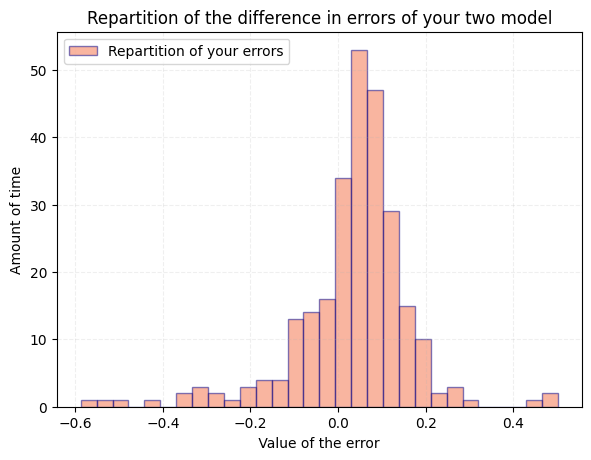

<ipython-input-7-d922b61625d1>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, errors, alpha=1, color='#f46d43', edgecolor='#f46d43', s=10, label='Data points', linewidths = 2, cmap='viridis')


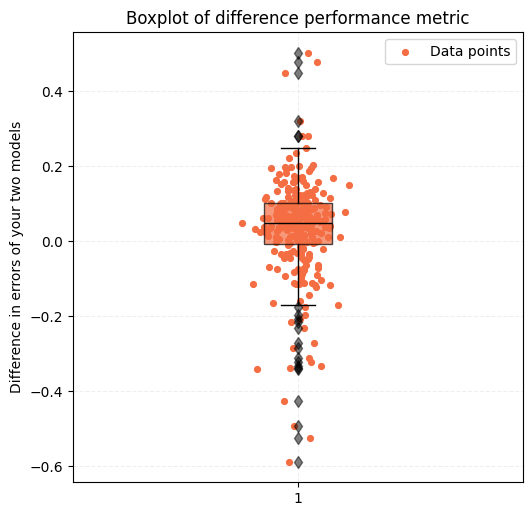

In [ ]:
def hist_errors():

          fig = plt.figure(figsize=(7,5))
          ax = fig.add_axes([0.15,0.15,0.75,0.75])

          plt.title("Repartition of the difference in errors of your two model")
          plt.hist(errors, bins=30, label=f"Repartition of your errors", color="#f46d43", edgecolor='darkblue',
                   alpha=0.5, rwidth = 1)
          plt.xlabel(" Value of the error ")
          plt.ylabel("Amount of time")
          plt.grid(True, linestyle='--', alpha=0.2)
          plt.legend()
          plt.show()

hist_errors()

def boxplot_errors():

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_axes([0.15,0.15,0.75,0.75])
    x = np.random.normal(1, 0.04, size=len(errors))

    ax.scatter(x, errors, alpha=1, color='#f46d43', edgecolor='#f46d43', s=10, label='Data points', linewidths = 2, cmap='viridis')
    ax.boxplot(errors, vert=True, patch_artist=True, boxprops=dict(facecolor="#f46d43", color='black', alpha = 0.7), medianprops=dict(color='black'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='d', color='black', alpha=0.5, markerfacecolor='black'))
    ax.set_title("Boxplot of difference performance metric"),
    ax.set_ylabel("Difference in errors of your two models")
    ax.grid(True, linestyle='--', alpha=0.2)
    ax.legend()

    plt.show()

boxplot_errors()

In [ ]:
def descriptive_statistics():

    empirical_mean = np.mean(errors)
    empirical_std_deviation = np.std(errors, ddof=1)
    q1 = np.percentile(errors, 25)
    med = np.percentile(errors, 50)
    q3 = np.percentile(errors, 75)
    skewness = skew(errors)
    kurt = kurtosis(errors)

    print("The empirical mean is :", empirical_mean)
    print("The empirical standard deviation is :", empirical_std_deviation)
    print("The empirical first quartile is :", q1)
    print("The empirical mediane is :", med)
    print("The empirical third quartile is :", q3)
    print("The skewness is;", skewness) # -2 < -1 < -0.5 < 0 < 0.5 < 1 < 2
    print("The kurtosis is;", kurt) #  uniform < 0 < extremas

    return empirical_mean, empirical_std_deviation, q1, med, q3, skewness, kurt

empirical_mean, empirical_std_deviation, q1, med, q3, skewness, kurt = descriptive_statistics()

The empirical mean is : 0.03360984047158552
The empirical standard deviation is : 0.13443198947786347
The empirical first quartile is : -0.007539407801803011
The empirical mediane is : 0.04947225368265107
The empirical third quartile is : 0.10075553871769247
The skewness is; -1.0612196934808598
The kurtosis is; 4.62638741732181


## Standard Error of the Mean

The standard error of the mean $SE(n\_test)$ is a measure of the dispersion of the sample mean from the true population mean. It is calculated using the sample standard deviation $s$ divided by the square root of the test sample size $n\_test$.

**When n\_test is large**, the Central Limit Theorem gives us the following formula:

$$
\bar{X} \sim \mathcal{N}\left(\mu, \frac{\sigma}{\sqrt{n}}\right)
$$

This expression leads to the expression of the standard error of the mean, $SE$ :

$$
SE(n\_test) = \frac{\sigma}{\sqrt{n\_test}}
$$

where:
- $σ$ is the sample standard deviation,
- $n\_test$ is the test sample size.

This formula helps to understand how much the sample mean is likely to vary from the true population mean. The larger the sample size, the smaller the standard error of the mean, indicating a more precise estimate of the population mean. This is referred to as parametric estimation.

**On the other hand,**

**When n\_test is small**, we no longer can use the Central Limit Theorem to compute the standard error.


Indeed, When the sample size n\_test is small, the distribution of the sample mean may not be approximately normal. This leads to:
- Non-normal sampling distribution
- Biased standard error
- Inaccurate confidence intervals

We need to use a **bootstrapped method** to determine the standard error.


In [ ]:
def standard_error():

    std_error_param = empirical_std_deviation/(len(errors)**0.5) # Parametric estimate

    B = 250 # Bootstrap estimate
    bootstrap_indices = np.random.choice(len(errors), size=(B, len(errors)), replace=True)

    bootstrap = []

    for indices in bootstrap_indices:
      boot_mean = np.mean(errors[indices])
      bootstrap.append(boot_mean)

    bootstrapped_mean = np.mean(bootstrap)
    bootstrapped_std_error = np.std(bootstrap)

    print("The original empirical mean is :", empirical_mean)
    print("The bootstrapped empirical mean is :", bootstrapped_mean)

    print("The empirical standard error is :", std_error_param)
    print("The bootstrapped empirical standard error is :", bootstrapped_std_error)

    return std_error_param, bootstrapped_std_error, bootstrap, bootstrapped_mean

std_error_param, bootstrapped_std_error, bootstrap, bootstrapped_mean = standard_error()


The original empirical mean is : 0.03360984047158552
The bootstrapped empirical mean is : 0.03431870542524253
The empirical standard error is : 0.008289431586455504
The bootstrapped empirical standard error is : 0.007953192463185765


In [ ]:
def mean_statistic(data):
    return np.mean(data, axis=-1)

## Confidence intervals of the mean, various bootstrapped methods

When the sample size \(n\) is sufficiently large, we can use the Central Limit Theorem to determine a confidence interval for the mean using the standard error.

### Theory
According to the Central Limit Theorem (CLT), if the sample size n is large (typically 30 is considered large enough), the distribution of the sample mean $\bar{X}$ will be approximately normally distributed, even if the original population distribution is not normal.

$$
\bar{X} \sim \mathcal{N}\left(\mu, \frac{\sigma}{\sqrt{n}}\right)
$$

The confidence interval for the mean would be given by:
$$\bar{X} \pm Z*\frac{\sigma}{\sqrt{n}}$$

**But in the most general case**, we can assume that the distribution of the mean follows a standard student distribution, that converges towards a normal distribution when n is large. Moreover we don't have information on $σ$, that we empirically determine with $s$.

$$\bar{X} \sim \mathcal{T}\left(n-1\right)$$ where n is the length of errors file.

The confidence interval for the mean is given by:
$$\bar{X} \pm t*\text{SE}$$
where:
- $\bar{X}$ is the sample mean.
- $t$ is the critical value from the student distribution for the desired confidence level, and with the corresponding degrees of freedom
- $\text{SE}$ is the empirical standard error of the mean, calculated as $\text{SE} = \frac{s}{\sqrt{n}}$.

This is the "parametric" interval

Else, we have **to bootstrap** the mean and take quantiles in order to make a 95% interval. We'll use 3 differents bootstrap techniques.

## Different bootstrap methods used :

Reminder : we have bootstraped (contained in the 'bootstrap' list) the value of the mean of our performance metric, here denoted as $m_1^*, m_2^*, ..., m_B^* $. The real value of the mean is $μ$, the empirical mean is $m$

### Percentile bootstrap

The percentile bootstrap uses the most intuitive percentiles of the bootstrap distribution, to create à 95% confidence interval:

$\left(\theta^*_{(\alpha / 2)}, \; \theta^*_{(1 - \alpha / 2)}\right)$
where $\theta^*_{(1 - \alpha / 2)}$ denotes the $1 - \alpha / 2$ percentile of the bootstrapped coefficients $\theta^*$.

### Basic bootstrap

The basic bootstrap (also known as the $\textbf{Reverse Percentile Interval}$) proceeds in a similar way to the basic bootstrap, using percentiles of the bootstrap distribution, but with a different formula (note the inversion of the left and right quantiles):

$\left(2\hat{\theta} - \theta^*_{(1 - \alpha / 2)}, \; 2\hat{\theta} - \theta^*_{(\alpha / 2)}\right)$
where $\theta^*_{(1 - \alpha / 2)}$ denotes the $1 - \alpha / 2$ percentile of the bootstrapped coefficients $\theta^*$

### Bias corrected accelerated bootstrap

The Bias-Corrected and Accelerated (BCA) bootstrap method is an advanced technique for constructing confidence intervals that accounts for both bias and skewness in the bootstrap distribution of the estimate. This method enhances the accuracy of the confidence intervals by correcting for bias and adjusting for the acceleration (skewness) of the distribution.

**First : the Bias Correction**

The bias correction step addresses the systematic error in the bootstrap estimates. Indeed, bootstrapped mean is often **upwardly biased** compared to empirical mean. The bias correction factor, denoted as $z_0$, is derived from the proportion of bootstrap estimates that are less than the empirical estimate $\hat{m}$. The formula for $z_0$ is given by:

$$
z_0 = \Phi^{-1} \left( \frac{1}{B} \sum_{b=1}^{B} \mathbf{1} (m^{*b} < \hat{m}) \right)
$$

where $\Phi^{-1}$ is the inverse cumulative distribution function (CDF) of the standard normal distribution, $m^{*b}$ are the bootstrap estimates, and $\hat{m}$ is the empirical estimate. This formula calculates the z-score corresponding to the percentile of bootstrap estimates below the empirical estimate. If many bootstrap estimates are below the empirical estimate, this indicates a negative bias, and vice versa.

**Secondly : the acceleration term**

The acceleration term, $a$, corrects for the skewness of the bootstrap distribution. It measures the rate of change of the standard error with respect to the true parameter value. The acceleration factor is calculated using the jackknife method, which involves systematically leaving out each observation from the sample and recalculating the estimate. The formula for $a$ is:

$$
a = \frac{\sum \left( \bar{\theta}_{\text{jackknife}} - \theta_{(i)} \right)^3}{6 \left( \sum \left( \bar{\theta}_{\text{jackknife}} - \theta_{(i)} \right)^2 \right)^{3/2}}
$$

where $\bar{\theta}_{\text{jackknife}}$ is the mean of the jackknife estimates, and $\theta_{(i)}$ are the individual jackknife estimates. This formula involves the third and second central moments of the jackknife estimates. A nonzero $a$ indicates asymmetry in the distribution of the estimate, and the correction helps to adjust for this skewness.

**Finally : the adjusted percentiles**

Using the bias correction factor $z_0$ and the acceleration factor $a$, the adjusted percentiles for the confidence interval are calculated. The formulas for the lower and upper percentiles are:

$$
\text{Lower percentile} = \Phi \left( z_0 + \frac{z_0 + z_{\alpha / 2}}{1 - a(z_0 + z_{\alpha / 2})} \right) \times 100
$$

$$
\text{Upper percentile} = \Phi \left( z_0 + \frac{z_0 + z_{1 - \alpha / 2}}{1 - a(z_0 + z_{1 - \alpha / 2})} \right) \times 100
$$

where $z_{\alpha / 2}$ and $z_{1 - \alpha / 2}$ are the critical values from the standard normal distribution for the given confidence level $\alpha$. These percentiles are then used to determine the BCA bootstrap confidence interval by taking the corresponding percentiles of the bootstrap distribution.

### Bias corrected bootstrap (BC)

We adjust the percentiles with a bias correction term but we don't include the acceleration term for the convergence. **Thus a = 0** Normally, as the computers are more powerful than we they were in the past, we should find the same results.

The percentiles are the following :

$$
\text{Lower percentile} = \Phi ( 2z_0 +  z_{\alpha / 2} ) \times 100
$$

$$
\text{Upper percentile} = \Phi ( 2z_0 +  z_{1 - \alpha / 2} ) \times 100
$$


### Other types of bootstrap

Other ways of bootstrapping can be found in various articles, for example in <u>"Computer Age Statistical Inference"</u> from Bradley Efron & Trevor Hastie, <u>"Bootstrap methods and their application"</u> from A.C. Davison & D.V. Hinkley, or <u>"An Introduction to the Bootstrap"</u> from Bradley Efron & RobertJ. Tibshirani.

We can talk for instance about Studentized Bootstrap, Moving Blocks Bootstrap, Bayesian Bootstrap...

Feel free to complete this notebook !

### Theoritical comparison on bootstrap methods

With the 4 various methods we have chosen to determine our intervals, there are some theoritical results that we should find empirically.

- Overall, the BCA bootstrap is supposed to be the best replication of the parametric method, because it corrects the problems of other methods
- The parametric method, as explained earlier, should be inaccurate as the sample size decreases (because CLT doesn't apply anymore)
- The basic bootstrap is not really effective with small sample sizes either, with 90% confidence intervals only containing the real value 78% of the time (Wikipedia). It is said to be less accurate than its percentile counterpart, especially in asymmetric case, because it requiers a symmetry assumption of the distribution around the observed statistic, here the mean.
- The percentile bootstrap works with every statistic and every distribution. Still it's more efficient when the distribution is symmetrical, centenred around the observed statistic, and the sample statistic is median-unbiased with maximum concentration. The symmetry ensures that the tails of the distribution are equally representative of the variation around the central value, so the percentile method will yield confidence intervals that are centered correctly and have the appropriate coverage probability.
It can still lead to bias and skewness.
- The basic / reverse percentile confidence intervals are easier to justify mathematically but they are less accurate in general than percentile confidence intervals, and some authors discourage their use.

1.969024973902692
A 95'%' confidence parametric interval for the mean is : [0.017287742658396825, 0.04993193828477422]
-------------------------------
A 95'%' percentile boostrap confidence interval for the mean is : [0.01635309996349788, 0.04781677248911558]
-------------------------------
A 95'%' basic boostrap confidence interval for the mean is : [0.019402908454055463, 0.050866580979673164]
-------------------------------
A 95'%' BCA confidence interval for the mean is : [0.01525548 0.0459442 ]
A 95'%' BC confidence interval for the mean is : [0.01530894 0.04664726]
-------------------------------
Width of the differents intervals :
Width of Parametric interval : 0.032644195626377395
Width of Percentile boot interval : 0.0314636725256177
Width of Basic boot interval : 0.0314636725256177
Width of BCA boot interval : 0.03068872398519963
Width of BC boot interval : 0.0313383260940453
-------------------------------


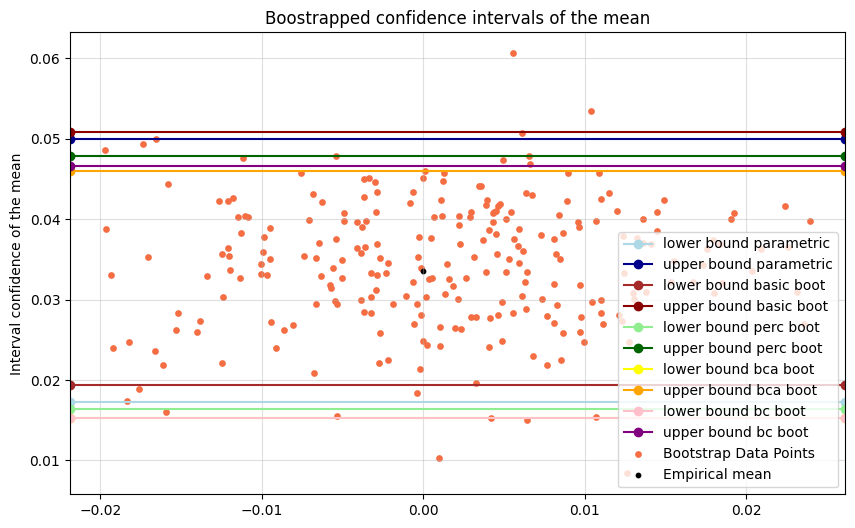

In [ ]:
def confidence_intervals():

    alpha = 0.05 # Confidence level
    n = len(errors)

    t_student = stats.t.ppf(1 - alpha / 2, n)
    print(t_student)
    lower = empirical_mean - t_student * std_error_param # Parametric method with student
    upper = empirical_mean + t_student * std_error_param

    conf_interval = pd.Interval(left=lower, right=upper, closed='both')

    print("A 95'%' confidence parametric interval for the mean is :", conf_interval)

    lower_boot = np.percentile(bootstrap , 100 * (alpha/2))
    upper_boot = np.percentile(bootstrap, 100 * (1 - alpha / 2))

    conf_interval_perc_boot = pd.Interval(left=lower_boot, right=upper_boot, closed='both') # Percentile bootstrap

    print("-------------------------------")

    print("A 95'%' percentile boostrap confidence interval for the mean is :", conf_interval_perc_boot)

    conf_interval_basic_boot = pd.Interval(left=2*empirical_mean-upper_boot, right=2*empirical_mean-lower_boot, closed='both') # basic bootstrap

    print("-------------------------------")

    print("A 95'%' basic boostrap confidence interval for the mean is :", conf_interval_basic_boot)

    # Bias correction
    z0 = stats.norm.ppf(np.mean(bootstrap < empirical_mean))

    z_alpha = norm.ppf(alpha / 2)
    z_1_alpha = norm.ppf(1 - alpha / 2)

    # Acceleration
    jackknife_samples = np.array([np.mean(np.delete(errors, i)) for i in range(len(errors))])
    jackknife_mean = np.mean(jackknife_samples)
    a = np.sum((jackknife_mean - jackknife_samples) ** 3) / (6 * np.sum((jackknife_mean - jackknife_samples) ** 2) ** 1.5)

    lower_percentile = norm.cdf(z0 + (z0 + z_alpha) / (1 - a * (z0 + z_alpha))) * 100
    upper_percentile = norm.cdf(z0 + (z0 + z_1_alpha) / (1 - a * (z0 + z_1_alpha))) * 100

    conf_interval_bca_boot = np.percentile(bootstrap, [lower_percentile, upper_percentile]) # BCA bootstrap`

    a = 0 # BC bootstrap

    lower_percentile = norm.cdf(z0 + (z0 + z_alpha) / (1 - a * (z0 + z_alpha))) * 100
    upper_percentile = norm.cdf(z0 + (z0 + z_1_alpha) / (1 - a * (z0 + z_1_alpha))) * 100

    conf_interval_bc_boot = np.percentile(bootstrap, [lower_percentile, upper_percentile])

    print("-------------------------------")

    print("A 95'%' BCA confidence interval for the mean is :", conf_interval_bca_boot)
    print("A 95'%' BC confidence interval for the mean is :", conf_interval_bc_boot)

    print("-------------------------------")

    print("Width of the differents intervals :")

    narrowness_student = (conf_interval.right - conf_interval.left)
    narrowness_perc = (conf_interval_perc_boot.right - conf_interval_perc_boot.left)
    narrowness_basic = (conf_interval_basic_boot.right - conf_interval_basic_boot.left)
    narrowness_bca = (conf_interval_bca_boot[1] - conf_interval_bca_boot[0])
    narrowness_bc = (conf_interval_bc_boot[1] - conf_interval_bc_boot[0])

    print("Width of Parametric interval :", narrowness_student)
    print("Width of Percentile boot interval :", narrowness_perc)
    print("Width of Basic boot interval :", narrowness_basic)
    print("Width of BCA boot interval :", narrowness_bca)
    print("Width of BC boot interval :", narrowness_bc)

    print("-------------------------------")

    y1, y2 = extract_bounds(conf_interval)
    y3, y4 = extract_bounds(conf_interval_basic_boot)
    y5, y6 = extract_bounds(conf_interval_perc_boot)
    y7, y8 = conf_interval_bca_boot[0], conf_interval_bca_boot[1]
    y9, y10 = conf_interval_bc_boot[0], conf_interval_bc_boot[1]

    plt.figure(figsize=(10, 6))
    plt.axhline(y1, label='lower bound parametric', marker='o', color="lightblue")
    plt.axhline(y2, label='upper bound parametric', marker='o', color="darkblue")
    plt.axhline(y3, label='lower bound basic boot', marker='o', color="brown")
    plt.axhline(y4, label='upper bound basic boot', marker='o', color="darkred")
    plt.axhline(y5, label='lower bound perc boot', marker='o', color="lightgreen")
    plt.axhline(y6, label='upper bound perc boot', marker='o', color="darkgreen")
    plt.axhline(y7, label='lower bound bca boot', marker='o', color="yellow")
    plt.axhline(y8, label='upper bound bca boot', marker='o', color="orange")
    plt.axhline(y9, label='lower bound bc boot', marker='o', color="pink")
    plt.axhline(y10, label='upper bound bc boot', marker='o', color="purple")


    jittered_x = np.random.normal(loc=0, scale=0.01, size=len(bootstrap))

    plt.scatter(jittered_x, bootstrap, alpha=1, color='#f46d43', edgecolor='#f46d43', s=8, label='Bootstrap Data Points', linewidths=2)
    plt.scatter(0, empirical_mean, color = 'black', s =10, label = "Empirical mean")

    plt.xlabel('')
    plt.ylabel('Interval confidence of the mean')
    plt.title('Boostrapped confidence intervals of the mean')
    plt.legend()
    plt.grid(True, alpha =0.4)
    plt.show()

    return (conf_interval, conf_interval_perc_boot, conf_interval_basic_boot, conf_interval_bca_boot, conf_interval_bc_boot,
   narrowness_student, narrowness_perc, narrowness_basic, narrowness_bca, narrowness_bc )

(conf_interval, conf_interval_perc_boot, conf_interval_basic_boot, conf_interval_bca_boot, conf_interval_bc_boot,
   narrowness_student, narrowness_perc, narrowness_basic, narrowness_bca, narrowness_bc ) = confidence_intervals()


In [ ]:
def plot_evolution_confidence_intervals(list_intervals, subset_sizes, title):
   lower_bounds = [interval.left for interval in list_intervals]
   upper_bounds = [interval.right for interval in list_intervals]

   plt.figure(figsize=(10, 6))
   plt.plot(subset_sizes, lower_bounds, label='Lower Bound', marker='o')
   plt.plot(subset_sizes, upper_bounds, label='Upper Bound', marker='o')
   plt.fill_between(subset_sizes, lower_bounds, upper_bounds, color='b', alpha=0.1)
   plt.xlabel('subset_sizes')
   plt.ylabel('Confidence Interval')
   plt.title(f"Evolution of Confidence Intervals, {title}")
   plt.legend()
   plt.grid(True)
   plt.show()

def plot_evolution_confidence_intervals_array(list_intervals, subset_sizes, title):
   lower_bounds = [interval[0] for interval in list_intervals]
   upper_bounds = [interval[1] for interval in list_intervals]
   k_values = range(1, len(list_intervals) + 1)

   plt.figure(figsize=(10, 6))
   plt.plot(subset_sizes, lower_bounds, label='Lower Bound', marker='o')
   plt.plot(subset_sizes, upper_bounds, label='Upper Bound', marker='o')
   plt.fill_between(subset_sizes, lower_bounds, upper_bounds, color='b', alpha=0.1)
   plt.xlabel('subset_sizes')
   plt.ylabel('Confidence Interval')
   plt.title(f"Evolution of Confidence Intervals, {title}")
   plt.legend()
   plt.grid(True)
   plt.show()

def plot_all_confidence_intervals(list_1, list_2, list_3, list_4, list_5, subset_sizes):

   lower_bound_1 = [interval.left for interval in list_1]
   upper_bound_1 = [interval.right for interval in list_1]

   lower_bound_2 = [interval.left for interval in list_2]
   upper_bound_2 = [interval.right for interval in list_2]

   lower_bound_3 = [interval.left for interval in list_3]
   upper_bound_3 = [interval.right for interval in list_3]

   lower_bound_4 = [interval[0] for interval in list_4]
   upper_bound_4 = [interval[1] for interval in list_4]

   lower_bound_5 = [interval[0] for interval in list_5]
   upper_bound_5 = [interval[1] for interval in list_5]

   plt.figure(figsize=(10, 6))

# Parametric bounds
   plt.plot(subset_sizes, lower_bound_1, label='Lower Bound Parametric', marker='o', color='black', linestyle='-')
   plt.plot(subset_sizes, upper_bound_1, label='Upper Bound Parametric', marker='o', color='black', linestyle='-')

# Basic Bootstrap bounds
   plt.plot(subset_sizes, lower_bound_2, label='Lower Bound Basic Boot', marker='s', color='red', linestyle='--')
   plt.plot(subset_sizes, upper_bound_2, label='Upper Bound Basic Boot', marker='s', color='red', linestyle='--')

# Percentile Bootstrap bounds
   plt.plot(subset_sizes, lower_bound_3, label='Lower Bound Perc Boot', marker='^', color='green', linestyle='-.')
   plt.plot(subset_sizes, upper_bound_3, label='Upper Bound Perc Boot', marker='^', color='green', linestyle='-.')

# BCa Bootstrap bounds
   plt.plot(subset_sizes, lower_bound_4, label='Lower Bound BCA Boot', marker='D', color='blue', linestyle=':')
   plt.plot(subset_sizes, upper_bound_4, label='Upper Bound BCA Boot', marker='D', color='blue', linestyle=':')

# BC Bootstrap bounds
   plt.plot(subset_sizes, lower_bound_5, label='Lower Bound BC Boot', marker='v', color='purple', linestyle=(0, (3, 5, 1, 5)))
   plt.plot(subset_sizes, upper_bound_5, label='Upper Bound BC Boot', marker='v', color='purple', linestyle=(0, (3, 5, 1, 5)))

   plt.fill_between(subset_sizes, lower_bound_1, upper_bound_1, color='b', alpha=0.1)
   plt.fill_between(subset_sizes, lower_bound_2, upper_bound_2, color='b', alpha=0.1)
   plt.fill_between(subset_sizes, lower_bound_3, upper_bound_3, color='b', alpha=0.1)
   plt.fill_between(subset_sizes, lower_bound_4, upper_bound_4, color='b', alpha=0.1)
   plt.fill_between(subset_sizes, lower_bound_5, upper_bound_5, color='b', alpha=0.1)

   plt.xlabel('subset_sizes')
   plt.ylabel('Confidence Interval')
   plt.title(f"Evolution of Confidence Intervals, different methods")
   plt.legend()
   plt.grid(True)
   plt.show()

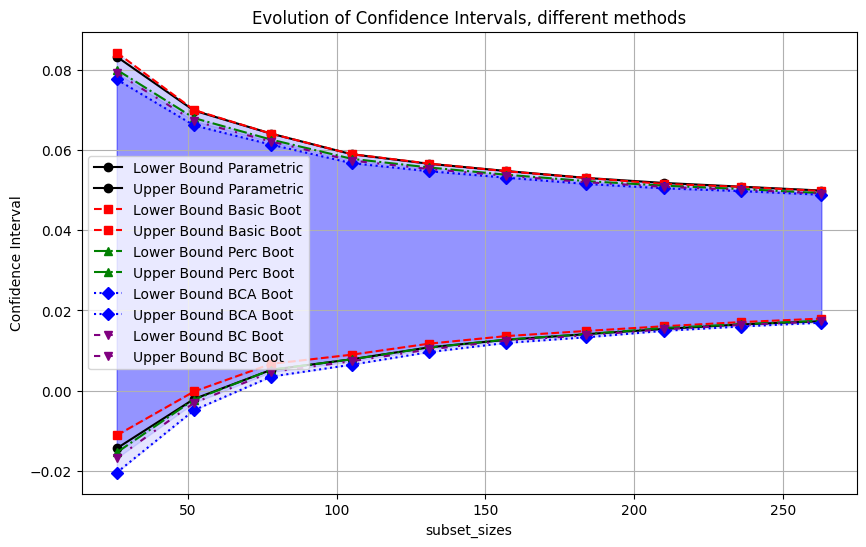

In [ ]:
def averaged_confidence_intervals(k, empirical_mean, num_samples=1000): # k number of progressive subsets you want, num_samples nb of simulation per subset

      alpha = 0.05 # Confidence level
      n = len(errors)

      t_student = stats.t.ppf(1 - alpha / 2, n)

      standard_errors_list_avg = []
      list_classic_intervals_avg = []
      list_classic_boot_intervals_avg = []
      list_percentile_boot_intervals_avg = []
      list_bca_boot_intervals_avg = []
      list_bc_boot_intervals_avg = []

      list_classic_coverage = []
      list_classic_boot_coverage = []
      list_percentile_boot_coverage = []
      list_bca_boot_coverage = []
      list_bc_boot_coverage = []

      n = len(errors)
      subset_sizes_avg = np.linspace(n // k, n, k, dtype=int)

      for size in subset_sizes_avg:

          sem_samples = []
          classic_intervals_samples = []
          classic_boot_intervals_samples = []
          percentile_boot_intervals_samples = []
          bca_boot_intervals_samples = []
          bc_boot_intervals_samples = []

          for _ in range(num_samples):

              data_subset = np.random.choice(errors, size=size, replace=False)

              mean_subset = np.mean(data_subset)
              sem = np.std(data_subset)/np.sqrt(size)

              sem_samples.append(sem)

              B = 250 # Bootstrap estimate
              bootstrap_indices_subset = np.random.choice(len(data_subset), size=(B, len(data_subset)), replace=True)

              bootstrap_subset = []
              for indices in bootstrap_indices_subset:
                  boot_mean_subset = np.mean(data_subset[indices])
                  bootstrap_subset.append(boot_mean_subset)

              bootstrapped_mean_subset = np.mean(bootstrap_subset)
              bootstrapped_std_error_subset = np.std(bootstrap_subset)

              lower = mean_subset - t_student * sem # Parametric method
              upper = mean_subset + t_student * sem
              classic_intervals_samples.append((lower, upper))

              lower_boot = np.percentile(bootstrap_subset , 100 * (alpha/2))
              upper_boot = np.percentile(bootstrap_subset, 100 * (1 - alpha / 2))
              percentile_boot_intervals_samples.append((lower_boot, upper_boot)) # Percentile bootstrap
              classic_boot_intervals_samples.append((2*mean_subset-upper_boot, 2*mean_subset-lower_boot)) # basic bootstrap

              # Acceleration
              jackknife_samples_subset = np.array([np.mean(np.delete(data_subset, i)) for i in range(len(data_subset))])
              jackknife_mean_subset = np.mean(jackknife_samples_subset)
              a_subset = np.sum((jackknife_mean_subset - jackknife_samples_subset) ** 3) / (6 * np.sum((jackknife_mean_subset - jackknife_samples_subset) ** 2) ** 1.5)

              # Bias correction
              z0_subset = stats.norm.ppf(np.mean(bootstrap_subset < mean_subset))
              z_alpha_subset = norm.ppf(alpha / 2)
              z_1_alpha_subset = norm.ppf(1 - alpha / 2)

              lower_percentile = norm.cdf(z0_subset + (z0_subset + z_alpha_subset) / (1 - a_subset * (z0_subset + z_alpha_subset))) * 100
              upper_percentile = norm.cdf(z0_subset + (z0_subset + z_1_alpha_subset) / (1 - a_subset * (z0_subset + z_1_alpha_subset))) * 100

              bca_boot_interval = np.percentile(bootstrap_subset, [lower_percentile, upper_percentile]) # BCA bootstrap
              bca_boot_intervals_samples.append(bca_boot_interval)

              a_subset = 0

              lower_percentile = norm.cdf(z0_subset + (z0_subset + z_alpha_subset) / (1 - a_subset * (z0_subset + z_alpha_subset))) * 100
              upper_percentile = norm.cdf(z0_subset + (z0_subset + z_1_alpha_subset) / (1 - a_subset * (z0_subset + z_1_alpha_subset))) * 100

              bc_boot_interval = np.percentile(bootstrap_subset, [lower_percentile, upper_percentile]) # BC bootstrap
              bc_boot_intervals_samples.append(bc_boot_interval)


          standard_errors_list_avg.append(np.mean(sem_samples))
          list_classic_intervals_avg.append(pd.Interval(left=np.mean([i[0] for i in classic_intervals_samples]), right=np.mean([i[1] for i in classic_intervals_samples]), closed='both'))
          list_classic_boot_intervals_avg.append(pd.Interval(left=np.mean([i[0] for i in classic_boot_intervals_samples]), right=np.mean([i[1] for i in classic_boot_intervals_samples]), closed='both'))
          list_percentile_boot_intervals_avg.append(pd.Interval(left=np.mean([i[0] for i in percentile_boot_intervals_samples]), right=np.mean([i[1] for i in percentile_boot_intervals_samples]), closed='both'))
          list_bca_boot_intervals_avg.append(np.mean(bca_boot_intervals_samples, axis=0))
          list_bc_boot_intervals_avg.append(np.mean(bc_boot_intervals_samples, axis=0))

      return subset_sizes_avg, standard_errors_list_avg, list_classic_intervals_avg, list_classic_boot_intervals_avg, list_percentile_boot_intervals_avg, list_bca_boot_intervals_avg, list_bc_boot_intervals_avg,



subset_sizes_avg, standard_errors_list_avg, list_parametric_intervals_avg, list_classic_boot_intervals_avg, list_percentile_boot_intervals_avg, list_bca_boot_intervals_avg, list_bc_boot_intervals_avg = averaged_confidence_intervals(10, 1000)

plot_all_confidence_intervals(list_parametric_intervals_avg, list_classic_boot_intervals_avg, list_percentile_boot_intervals_avg, list_bca_boot_intervals_avg, list_bc_boot_intervals_avg, subset_sizes_avg)


# II - Statistical testing

We want to assess if the difference between the two populations is statistically significant.
Null hypothesis $H_0$ and its alternative $H_1$ are defined as followed :
\begin{align*}
H_0 &: \mu_A = \mu_B \\
H_1 &: \mu_A \neq \mu_B
\end{align*}

The test statistic can be written as followed :
$$
T = \frac{μ_D}{SE(m_D)}
$$
Where $μ_D$ and $m_D$ represent the real mean of $D = A - B$ and its empirical counterpart, and $SE(m_D)$ is the standard error of the mean of the difference.

If the p value is under 0.05, we reject the null hypothesis, and thus we can affirm that the two models don't have the same performance.

This is a paired test

## II.1 - Parametric, permutation and bootstrap testing



In [ ]:
def statistical_testing():

    alpha = 0.05
    num_permutations = 1000
    supposed_mu = 0 # to change (here, equality of performance)

    t_stat, p_value = ttest_rel(errors_1, errors_2)
    print("The scipy t_stat is :", t_stat)
    print("The scipy p-value is :", p_value)
    print("-------------------------------")

    test_stat = (empirical_mean-supposed_mu)/std_error_param # Bilateral test.
    student = stats.t.ppf(1-alpha/2, df=len(errors)-1)

    print("student quantile:", student)
    print("Hand made t-stat:", test_stat)


    p_value = 2*(1 - stats.t.cdf(abs(test_stat), df=len(errors)-1))
    puissance = 1 - stats.norm.cdf(student - test_stat, 0, 1)

    print("The following bilateral test checks if your hypothesis on the equal performance of two models is reasonable :")
    print("The hand made p-value of the bilateral test is :", p_value)
    print("The power of the bilateral test is :", puissance)
    print("-------------------------------")


    # With bootstrapped values

    test_stat_boot = (bootstrapped_mean-supposed_mu)/bootstrapped_std_error

    print("t-stat boot:", test_stat_boot)

    p_value_boot = 2*(1 - stats.t.cdf(abs(test_stat_boot), df=len(errors)-1))
    puissance_boot = 1 - stats.norm.cdf(student - test_stat_boot, 0, 1)

    print("The bootstrapped p-value of the bilateral test is :", p_value_boot)
    print("The bootstrapped power of the bilateral test is :", puissance_boot)

    return p_value, p_value_boot

p_value, p_value_boot = statistical_testing()


The scipy t_stat is : 4.054541028663804
The scipy p-value is : 6.628938630797202e-05
-------------------------------
student quantile: 1.9690597152559444
Hand made t-stat: 4.054541028663803
The following bilateral test checks if your hypothesis on the equal performance of two models is reasonable :
The hand made p-value of the bilateral test is : 6.628938630792724e-05
The power of the bilateral test is : 0.9814871836775558
-------------------------------
t-stat boot: 4.315085493542259
The bootstrapped p-value of the bilateral test is : 2.263102768806924e-05
The bootstrapped power of the bilateral test is : 0.9905126024618323


### II.2 Non parametric testing - Wilcoxon signed rank

The Wilcoxon Signed-Rank Test is a non-parametric statistical test used to compare two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ. It is often used as an alternative to the paired t-test when the data cannot be assumed to be normally distributed.

$W^+$ is the sum of the ranks for the positive differences.
$W^-$is the sum of the ranks for the negative differences.
The test statistic $W$ is the smaller of $W^+$ and $W^-$

In [ ]:
def statistical_testing_wilcoxon():

    alpha = 0.05
    supposed_mu = 0

    # Wilcoxon signed-rank test
    wilcoxon_result = stats.wilcoxon(errors - supposed_mu)
    p_value_wil = wilcoxon_result.pvalue

    print("The following bilateral test checks if your hypothesis on the equal performance of two models is reasonable:")
    print("The p-value of the Wilcoxon signed-rank test is:", p_value_wil)

    return p_value_wil

p_value_wil = statistical_testing_wilcoxon()

The following bilateral test checks if your hypothesis on the equal performance of two models is reasonable:
The p-value of the Wilcoxon signed-rank test is: 6.808604570905525e-10


## The following bayesian part only works under certains approximations that are detailed in the paragraph.

## II.3 - Bayesian testing

We make a Bayesian Z test, as we consider the standard deviation is known.
We keep the same two hypothesis :
\begin{align*}
H_0 &: \mu_A = \mu_B \\
H_1 &: \mu_A \neq \mu_B
\end{align*}

And now we have to make two assumptions :    
- The first one on the distribution followed by our errors, **the likelihood** (we can use the descriptive statistics part to make a choice)
- The second one on the belief we have on the parameter we want to estimate, **a prior**, but not too much informative in order to let the parameters be influenced by the data.

We'll take the following example :

We want to test that $H_0 : \mu_D =$ 0 against $H_1 :\mu_D \neq$ 0.

- We make the prior that $\mu_D \sim \mathcal{N}(0, 1)$
- We calculate the likelihood assuming the difference of our errors is normally distributed : $errors_D \sim \mathcal{N}(\mu_D, \sigma_D^2)$

For Bayesian testing, we want to determine the Bayes Factor to see if the null hypothesis is reasonable or not. The bayesian is defined as followed :    
$$
BF = \frac{p(D \mid H_0)}{p(D \mid H_1)}
$$
where D denotes the data. The goal is to determine which hypothesis is the most likely to be true according to what we have observed with the data.

Under the null hypothesis, the marginal likelihood under $H_O$ is :
$$
p(D \mid H_0) = \left( \frac{1}{\sqrt{2 \pi \sigma^2}} \right)^n \exp \left( -\frac{1}{2\sigma^2} \sum_{i=1}^n x_i^2 \right)
$$


Under the alternative, the marginal likelihood is obtained by integrating the posterior on all the non zero possible values of μ  :

$$
p(D \mid H_1) = \int p(D \mid \mu) prior(\mu) d\mu
$$

First, let's recall the likelihood :     
$$
p(D \mid \mu) = \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right)^n \exp \left( -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2 \right)
$$

And the density of our prior :      

$$
prior(\mu) = \mathcal{N}(0, 1) = \frac{1}{\sqrt{2\pi}} \exp \left( -\frac{1}{2} \mu^2 \right)
$$

Combining both we obtain :

$$
p(D \mid H_1) = \int_{-\infty}^{\infty} \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right)^n \exp \left( -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2 \right) \cdot \frac{1}{\sqrt{2\pi}} \exp \left( -\frac{1}{2} \mu^2 \right) d\mu
$$



In [ ]:
from scipy.integrate import quad

n = len(errors)
sigma_squared = empirical_std_deviation**2

def integrand(mu):
    likelihood_mu = ((1 / np.sqrt(2 * np.pi * sigma_squared)) ** n) * np.exp(-1 / (2 * sigma_squared) * np.sum((errors - mu)**2))
    prior_mu = (1 / np.sqrt(2 * np.pi )) * np.exp((-1/2) * (mu)**2)
    return likelihood_mu * prior_mu

likelihood_h0, _ = quad(integrand, -np.inf, 0)
likelihood_h1, _ = quad(integrand, 0, np.inf)

likelihood_h0_2 = ((1 / np.sqrt(2 * np.pi * sigma_squared)) ** n) * np.exp(-1 / (2 * sigma_squared) * np.sum((errors)**2))
likelihood_h1_2, _ = quad(integrand, -np.inf, np.inf)

# Bayes factor
Bayes_factor_uni = likelihood_h0 / likelihood_h1
Bayes_factor_bil = likelihood_h0_2 / likelihood_h1_2

print("Bayes factor unilateral:", Bayes_factor_uni)
print("Bayes factor bilateral:", Bayes_factor_bil)


def prior(mu):
   test = ((1 / np.sqrt(2 * np.pi )) * np.exp((-1/2) * (mu)**2))
   return test

prior_odds_uni = 1

test1 = (1 / np.sqrt(2 * np.pi))
test2 = 1 - (1 / np.sqrt(2 * np.pi))

prior_odds_bil = test1/test2
print("Prior odds unilatéral :", prior_odds_uni)
print("Prior odds bilatéral :", prior_odds_bil)

print("Posterior odds unilatéral prévu:", prior_odds_uni*Bayes_factor_uni)
print("Posterior odds bilatéral prévu :", prior_odds_bil*Bayes_factor_bil)


Bayes factor unilateral: 2.5132018444941754e-05
Bayes factor bilateral: 0.032507694293768465
Prior odds unilatéral : 1
Prior odds bilatéral : 0.6637337270501693
Posterior odds unilatéral prévu: 2.5132018444941754e-05
Posterior odds bilatéral prévu : 0.021576453091410465


But we can also compute the **posterior odds**.

While the **Bayes Factor** shows how much more likely the data is under one hypothesis vs the other.
The **posterior odds** shows how much more likely one hypothesis is compared to the other, taking both prior beliefs and the evidence from the data into account. Odds are directly interpretable. For instance, if Ω = 19, the null is 19 times more probable than the alternative, given the data

$$
Ω = \frac{p(H_0 \mid D)}{p(H_1 \mid D)}
$$

according to sofiene's work :    
$$
p(\mu \mid \mathbf{x}, \mu_p, \sigma_p^2) = \mathcal{N} \left( \mu ; \bar{x}, \frac{\sigma^2}{n} \right) \quad
$$

It leads to for an unilatéral test :

$$
p(H_1 \mid \mathbf{x}, \mu_p, \sigma_p^2) = p(\mu > 0 \mid \mathbf{x}, \mu_p, \sigma_p^2) \\
= \int_0^\infty \mathcal{N} \left( \mu; \bar{x}, \frac{\sigma^2}{n} \right) d\mu \\
= P \left( \bar{x} + \frac{\sigma}{\sqrt{n}} Z > 0 \right) \quad \text{with} \quad Z \sim \mathcal{N}(0,1) \\
$$

And as the sample is known, we can compute the empirical values of x̄ and σ


$$
= P \left( Z > \frac{m_D}{SE_D} \right)
$$

and for the null hypothesis

$$
p(H_0 \mid \mathbf{x}, \mu_p, \sigma_p^2) = p(\mu < 0 \mid \mathbf{x}, \mu_p, \sigma_p^2) \\
=  \int_{-\infty}^{0} \mathcal{N} \left( \mu; \bar{x}, \frac{\sigma^2}{n} \right) d\mu \\
= P \left( \bar{x} + \frac{\sigma}{\sqrt{n}} Z < 0 \right) \quad \text{with} \quad Z \sim \mathcal{N}(0,1) \\
= P \left( Z < \frac{m_D}{SE_D} \right)
$$

In [ ]:
z_value_uni = (empirical_mean)/std_error_param
odds_uni = (1-norm.cdf(z_value_uni))/norm.cdf(z_value_uni)

# For a bilateral test

left = (1/np.sqrt(2*(np.pi)*std_error_param**2))
right = np.exp(-(1/(2*std_error_param**2))*empirical_mean**2)

h0_knowing_D = left*right
h1_knowing_D = 1 - h0_knowing_D
odds_bil = h0_knowing_D/h1_knowing_D


print("Posterior odds unilatéral prévu:", prior_odds_uni*Bayes_factor_uni)
print("Posterior odds unilatéral:", odds_uni)
print("Posterior odds bilatéral prévu :", prior_odds_bil*Bayes_factor_bil)
print("Posterior odds bilatéral:", odds_bil )

Posterior odds unilatéral prévu: 2.5132018444941754e-05
Posterior odds unilatéral: 2.511704767691489e-05
Posterior odds bilatéral prévu : 0.021576453091410465
Posterior odds bilatéral: 0.013131117555661358


# Saving data

In [ ]:
def save_data():
    data = {
    "Empirical mean": empirical_mean,
    "Empirical standard deviation": empirical_std_deviation,
    "Empirical first quartile": q1,
    "Empirical median": med,
    "Empirical third quartile": q3,
    "Bootstrapped empirical mean": bootstrapped_mean,
    "Empirical standard error": bootstrapped_std_error,
    "Bootstrapped empirical standard error": std_error_param,
    "95% confidence interval for the mean": str(conf_interval),
    "95% percentile bootstrap confidence interval for the mean": str(conf_interval_perc_boot),
    "95% basic bootstrap confidence interval for the mean": str(conf_interval_basic_boot),
    "95% accelerated bootstrap confidence interval for the mean": str(conf_interval_bca_boot),
    "Normalized width of studentized interval": narrowness_student,
    "Normalized width of basic bootstrapped interval ": narrowness_basic,
    "Normalized width of percentile bootstrapped interval ": narrowness_perc,
    "Normalized width of BCA bootstrapped interval ": narrowness_bca,
    "The bootstrapped p-value of the bilateral test is ": p_value_boot,
    "The p-value of the Wilcoxon signed-rank test is": p_value_wil,
    "Unilateral Bayes Factor is": Bayes_factor_uni,
    "Unilateral posterior odds is": odds_uni,
    "Bilateral Bayes Factor is": Bayes_factor_bil,
    "Bilateral posterior odds is": odds_bil,

}


    json_file_path = f"statistics_comparison_{model}_{metric}_{additional}_summary.json" # a modifier
    with open(json_file_path, 'w') as json_file:
       json.dump(data, json_file, indent=4)

    print(f"Data have been saved in the file {json_file_path}")

save_data()


Data have been saved in the file statistics_comparison_8_vs_7_DCS_BRATS_L1_BRATS_L1_summary.json
